# KNN classification to predict Energy consumption efficiency rating
- 비전공자를 위한 인공지능 기말고사 대체 과제 : k-NN 분류를 이용한 데이터 분석
- 2017010698 수학과 오서영

## 1. Import Packages

In [82]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. Make Dataset

In [42]:
# independent variable : shape of [최대소비전력량, 시간당 이산화탄소 배출량(g), 연간 에너지 비용]
X = np.array([[18.44, 3, 12000], [56.61, 15, 50000], [35.69, 9, 27000], [20.32, 5, 17000], [50.16, 14, 46000], [64.65, 17, 57000], 
              [41.47, 13, 44000], [32.43, 9, 31000], [32.43, 9, 31000], [39.82, 17, 56000], [23.85, 5, 17000], [67.98, 18, 60000], 
              [67.98, 18, 60000], [67.76, 18, 60000], [67.98, 18, 60000], [64.55, 17, 56000], [74.73, 21, 69000], [66.4, 19, 62000], 
              [20.19, 9, 28000], [50.23, 17, 57000], [19.67, 6, 21000], [19.67, 6, 21000], [19.67, 6, 21000], [19.67, 6, 21000], 
              [19.67, 6, 21000], [19.67, 6, 21000], [19.67, 6, 21000], [19.67, 6, 21000], [65.72, 20, 68000], [33.87, 14, 47000], 
              [38.23, 16, 53000], [18.47, 0, 23000], [35.75, 11, 39000], [58.96, 28, 91000], [72.7, 21, 69000], [72.15, 21, 69000], 
              [66.7, 21, 69000], [38.33, 10, 32000], [68.13, 18, 61000], [68.13, 18, 61000], [61.43, 23, 75000], [59.0, 22, 72000], 
              [58.92, 22, 72000], [67.96, 20, 66000], [32.21, 14, 48000], [32.21, 14, 48000], [62.32, 20, 65000], [65.44, 17, 58000], 
              [65.88, 17, 58000], [32.53, 7, 22000], [65.88, 20, 66000], [59.88, 23, 77000], [65.5, 18, 59000], [70.63, 18, 59000], 
              [70.63, 18, 59000], [70.42, 21, 69000], [28.9, 12, 39000], [50.2, 17, 55000], [69.43, 19, 63000], [18.42, 5, 15000], 
              [65.5, 18, 59000], [70.06, 20, 64000], [70.42, 21, 69000], [67.74, 15, 50000], [70.06, 20, 64000], [70.06, 20, 64000], 
              [70.42, 21, 69000], [70.06, 20, 64000], [67.74, 15, 50000], [67.72, 18, 61000], [69.43, 19, 63000], [34.51, 11, 38000], 
              [34.51, 11, 38000], [20.19, 6, 19000], [32.38, 7, 24000], [20.12, 5, 16000], [20.12, 5, 16000], [39.02, 11, 36000], 
              [35.69, 9, 27000], [39.61, 12, 40000], [39.61, 12, 40000], [34.71, 12, 38000], [64.65, 17, 57000], [38.67, 13, 44000], 
              [38.67, 13, 44000], [70.01, 20, 64000], [38.26, 17, 55000], [67.72, 18, 61000], [67.72, 18, 61000], [67.72, 18, 61000], 
              [35.61, 8, 26000], [38.67, 13, 44000], [38.67, 13, 44000], [38.67, 13, 44000], [20.32, 5, 17000], [33.52, 8, 27000], 
              [36.04, 12, 41000], [69.43, 19, 63000], [64.65, 17, 57000], [33.52, 8, 27000], [35.61, 8, 26000], [35.61, 8, 26000], 
              [69.85, 20, 64000], [69.45, 19, 63000], [38.67, 13, 44000], [64.54, 15, 50000], [64.65, 17, 57000], [56.6, 14, 48000], 
              [41.23, 16, 52000], [49.72, 12, 40000], [56.61, 15, 50000], [20.12, 5, 16000], [34.71, 12, 38000], [50.16, 14, 46000], 
              [18.44, 3, 12000], [20.12, 5, 16000], [39.77, 10, 34000], [45.43, 14, 45000], [19.67, 6, 21000], [19.67, 6, 21000], 
              [68.84, 21, 71000], [71.58, 22, 72000], [60.1, 28, 94000], [67.79, 18, 61000], [40.16, 14, 48000], [40.16, 14, 48000], 
              [62.92, 23, 76000], [71.58, 22, 72000], [71.58, 22, 72000], [65.88, 20, 66000], [51.46, 14, 48000], [66.64, 18, 59000], 
              [66.64, 18, 59000], [60.81, 21, 70000], [65.88, 20, 66000], [62.32, 20, 65000], [68.7, 21, 69000], [68.7, 21, 69000], 
              [59.0, 28, 91000], [47.46, 12, 39000], [57.02, 16, 52000], [21.35, 0, 28000], [70.4, 18, 59000], [73.89, 23, 76000], 
              [47.28, 12, 39000], [33.87, 14, 47000], [68.13, 18, 61000], [65.24, 21, 69000], [65.24, 21, 69000], [50.2, 17, 55000], 
              [54.91, 19, 62000], [54.91, 19, 62000], [60.1, 21, 69000], [34.69, 12, 39000], [31.89, 10, 34000], [38.29, 10, 33000], 
              [58.88, 34, 110000], [38.29, 10, 33000], [65.24, 21, 69000], [71.4, 18, 60000], [41.48, 11, 37000], [20.19, 5, 16000], 
              [49.92, 14, 46000], [32.21, 9, 29000], [35.69, 9, 27000], [59.0, 22, 72000], [39.89, 13, 43000], [39.89, 13, 43000], 
              [39.89, 13, 43000], [63.43, 19, 62000], [33.73, 5, 15000], [39.89, 13, 43000], [39.89, 13, 43000], [39.89, 13, 43000], 
              [34.31, 9, 28000], [19.53, 0, 25000], [18.45, 6, 18000], [65.24, 21, 69000], [18.4, 4, 13000], [34.89, 11, 38000], 
              [67.55, 17, 56000], [38.59, 10, 33000], [38.59, 10, 33000], [38.59, 10, 33000], [38.59, 10, 33000], [38.59, 10, 33000], 
              [35.31, 13, 41000], [34.31, 9, 28000], [67.98, 18, 60000], [67.76, 18, 60000], [18.45, 6, 20000], [35.61, 8, 26000], 
              [73.29, 17, 57000], [19.67, 6, 21000], [21.34, 6, 21000], [36.04, 12, 41000], [32.21, 9, 29000], [73.5, 18, 59000], 
              [68.91, 17, 54000], [72.94, 20, 65000]])

# dependent variable : 에너지 소비 효율 등급 (energy consumption efficiency rating)
y = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 
              1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 
              0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 
              1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 
              2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 
              1, 0, 0, 0, 1])

In [43]:
# Explore dataset
print("shape of X :", X.shape)
print("shape of y :", y.shape)

shape of X : (200, 3)
shape of y : (200,)


In [113]:
x1 = []
x2 = []
x3 = []
for i in range(200):
    x1.append(X[i,0])
    x2.append(X[i,1])
    x3.append(X[i,2])

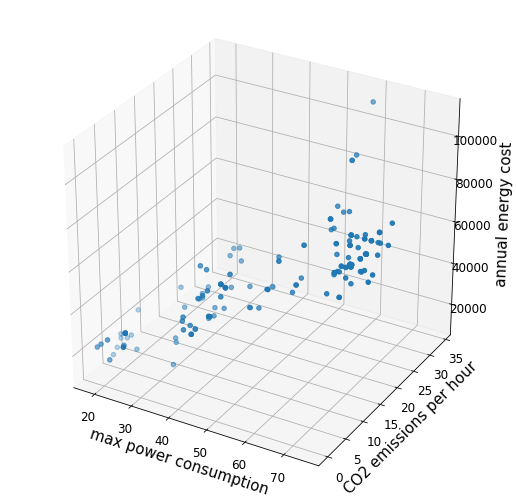

In [122]:
# visualization
plt.rcParams["figure.figsize"] = (9,9)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(x1, x2, x3)
ax.set_xlabel("max power consumption", fontsize = 15)
ax.set_ylabel("CO2 emissions per hour", fontsize = 15)
ax.set_zlabel("annual energy cost", fontsize = 15, labelpad = 13)
plt.show()

In [123]:
# Normalization
min_max_scaler = MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)

In [124]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=1004)

In [126]:
# Explore dataset
print("shape of x_train :", X_train.shape)
print("shape of y_train :", y_train.shape)
print("shape of x_test :", X_test.shape)
print("shape of y_test :", y_test.shape)

shape of x_train : (160, 3)
shape of y_train : (160,)
shape of x_test : (40, 3)
shape of y_test : (40,)


## 3. k-NN Classification

In [128]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [133]:
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [134]:
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [135]:
knn4 = KNeighborsClassifier(n_neighbors = 4)
knn4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [136]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 4. Result

In [137]:
print("train accuracy of knn with k=1 :", metrics.accuracy_score(y_train,  knn1.predict(X_train)))
print("test accuracy of knn with k=1 :", metrics.accuracy_score(y_test,  knn1.predict(X_test)))

train accuracy of knn with k=1 : 1.0
test accuracy of knn with k=1 : 0.925


In [138]:
print("train accuracy of knn with k=2 :", metrics.accuracy_score(y_train,  knn2.predict(X_train)))
print("test accuracy of knn with k=2 :", metrics.accuracy_score(y_test,  knn3.predict(X_test)))

train accuracy of knn with k=2 : 0.96875
test accuracy of knn with k=2 : 0.925


In [139]:
print("train accuracy of knn with k=3 :", metrics.accuracy_score(y_train,  knn3.predict(X_train)))
print("test accuracy of knn with k=3 :", metrics.accuracy_score(y_test,  knn3.predict(X_test)))

train accuracy of knn with k=3 : 0.95625
test accuracy of knn with k=3 : 0.925


In [140]:
print("train accuracy of knn with k=4 :", metrics.accuracy_score(y_train,  knn4.predict(X_train)))
print("test accuracy of knn with k=4 :", metrics.accuracy_score(y_test,  knn4.predict(X_test)))

train accuracy of knn with k=4 : 0.94375
test accuracy of knn with k=4 : 0.875


In [141]:
print("train accuracy of knn with k=5 :", metrics.accuracy_score(y_train,  knn5.predict(X_train)))
print("test accuracy of knn with k=5 :", metrics.accuracy_score(y_test,  knn5.predict(X_test)))

train accuracy of knn with k=5 : 0.93125
test accuracy of knn with k=5 : 0.875


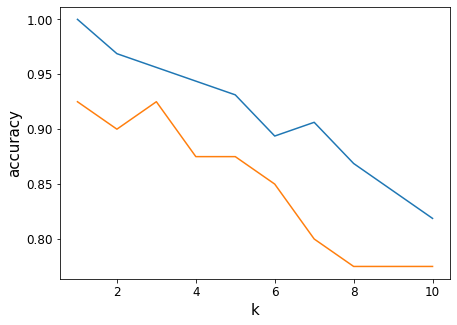

In [164]:
# change k
plt.rcParams["figure.figsize"] = (7,5)
train_accuracy = []
test_accuracy = []
n_neighbors = range(1, 11)

for n in n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
     
plt.plot(n_neighbors, train_accuracy, label = 'train_accuracy')
plt.plot(n_neighbors, test_accuracy, label = 'test_accuracy')
plt.xlabel("k", fontsize = 15)
plt.ylabel("accuracy", fontsize = 15)
plt.show()

## 5. Prediction

In [151]:
x_new = [[70, 20, 60000]]
a_pred = knn3.predict(x_new)
print("주어진 데이터의 예측 등급은",a_pred,"입니다")

주어진 데이터의 예측 등급은 [2] 입니다
